# SNA Final Paper Fall 2020
## Azeem Ullah - 19K0875

### Question # 1: On the constructed social network, identify the network properties.

### Constructing Social Network from Data

In [1]:
# Data was collected from SocArXiv provided for following research paper:
# The Small-World Network of College Classes: Implications for Epidemic Spread on a University Campus
# Kim A. Weeden, Benjamin Cornwell

import pandas as pd
import numpy as np
df = pd.read_csv("./Weeden_Cornwell_2020_SocSci_data.csv") 

In [2]:
df.describe()

,stid,crsid,gradstudent
count,118314.000000,118314.000000,118314.000000
mean,11513.815576,3018.463588,0.298274
std,6332.476424,1635.311710,0.457502
min,1.000000,1.000000,0.000000
25%,6014.000000,1766.000000,0.000000
50%,11695.000000,2927.000000,0.000000
75%,17191.000000,4362.000000,1.000000
max,22051.000000,6072.000000,1.000000


In [3]:
# Using 1K rows only
df = df.iloc[:5000,:]

In [4]:
# Count of # of under-grad (0) and grad (1) students in selection
df['gradstudent'].value_counts()

1    4369
0     631
Name: gradstudent, dtype: int64

In [5]:
# Using only grad students data
prof = df[df["gradstudent"] == 1]

### Creating Network

In [6]:
import networkx as nx
Comunity=nx.from_pandas_edgelist(prof, 'stid', 'crsid', edge_attr=None ,create_using=nx.Graph())

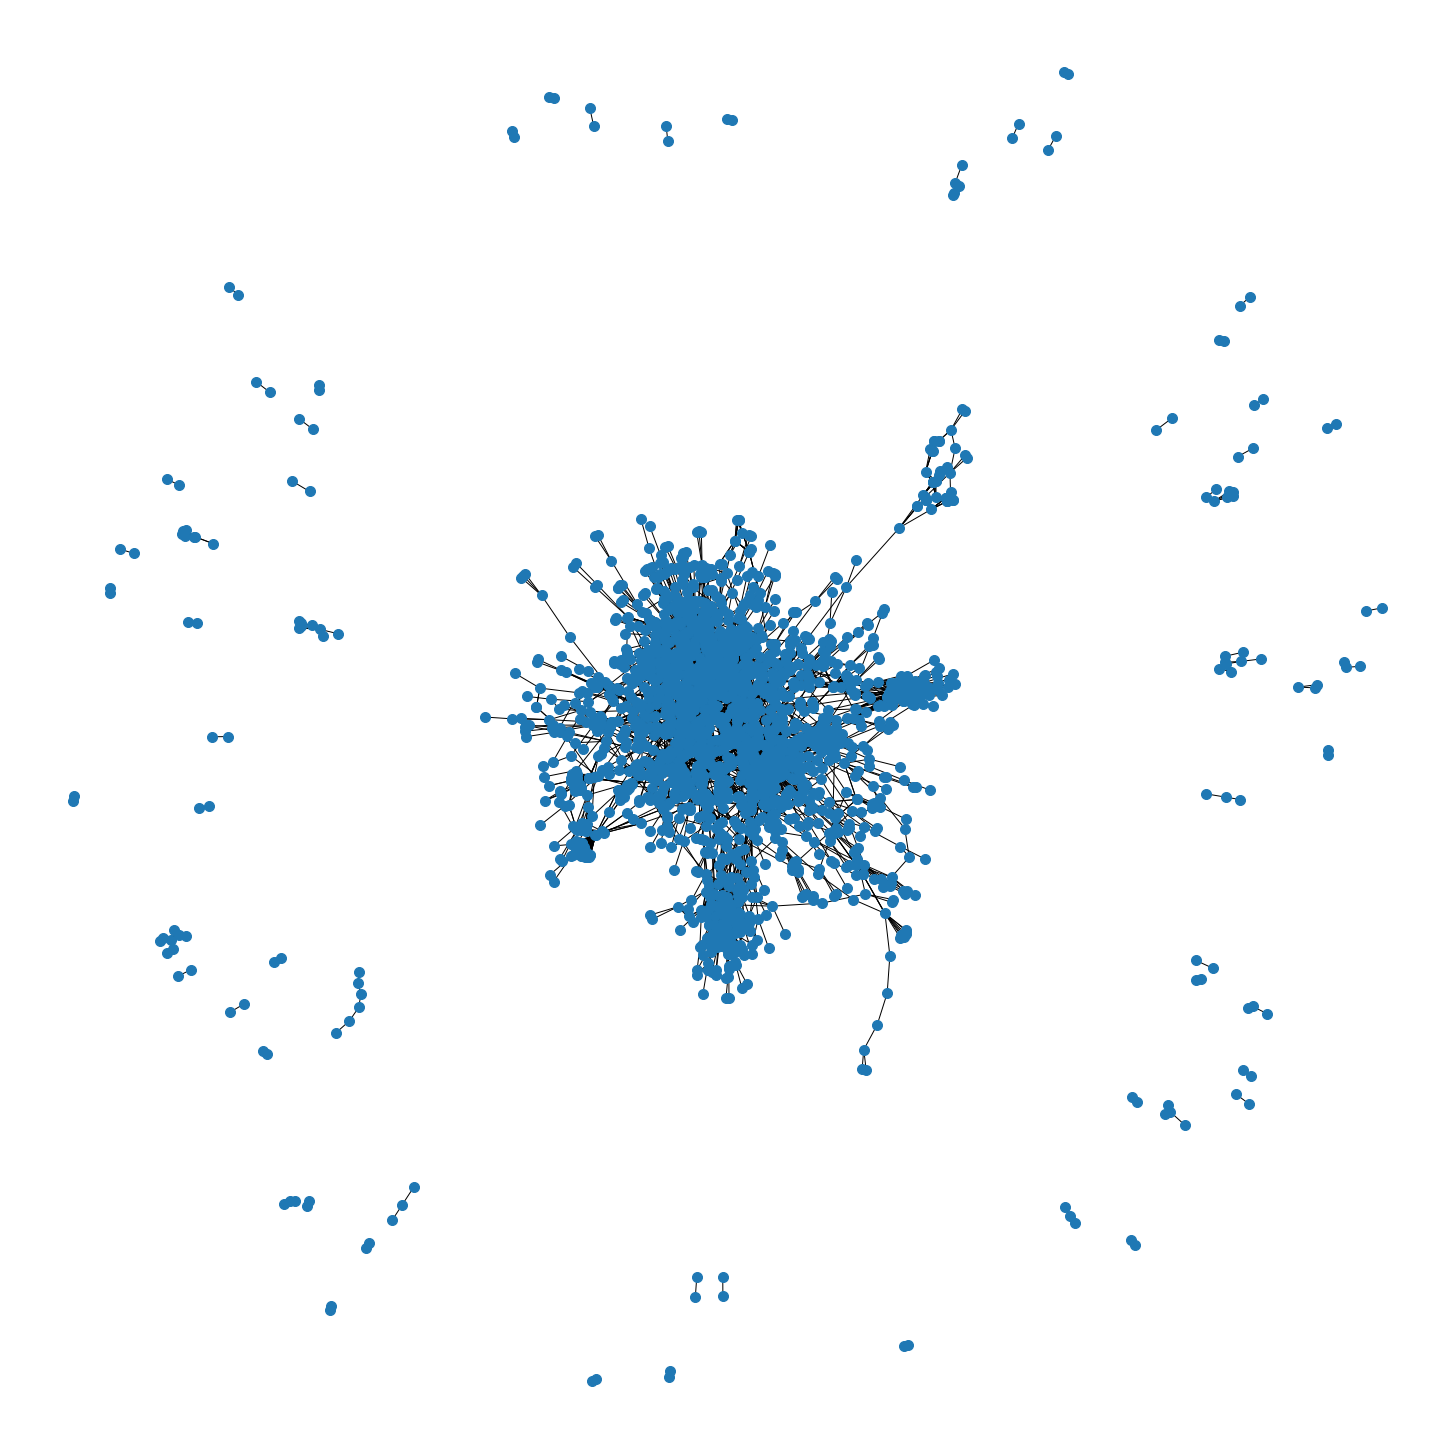

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
nx.draw(Comunity,node_size=100)
plt.show()

### Network Properties

### 1.1 Degree Centrality

In [8]:
from collections import Counter
degcent = dict(nx.degree(Comunity)).values()

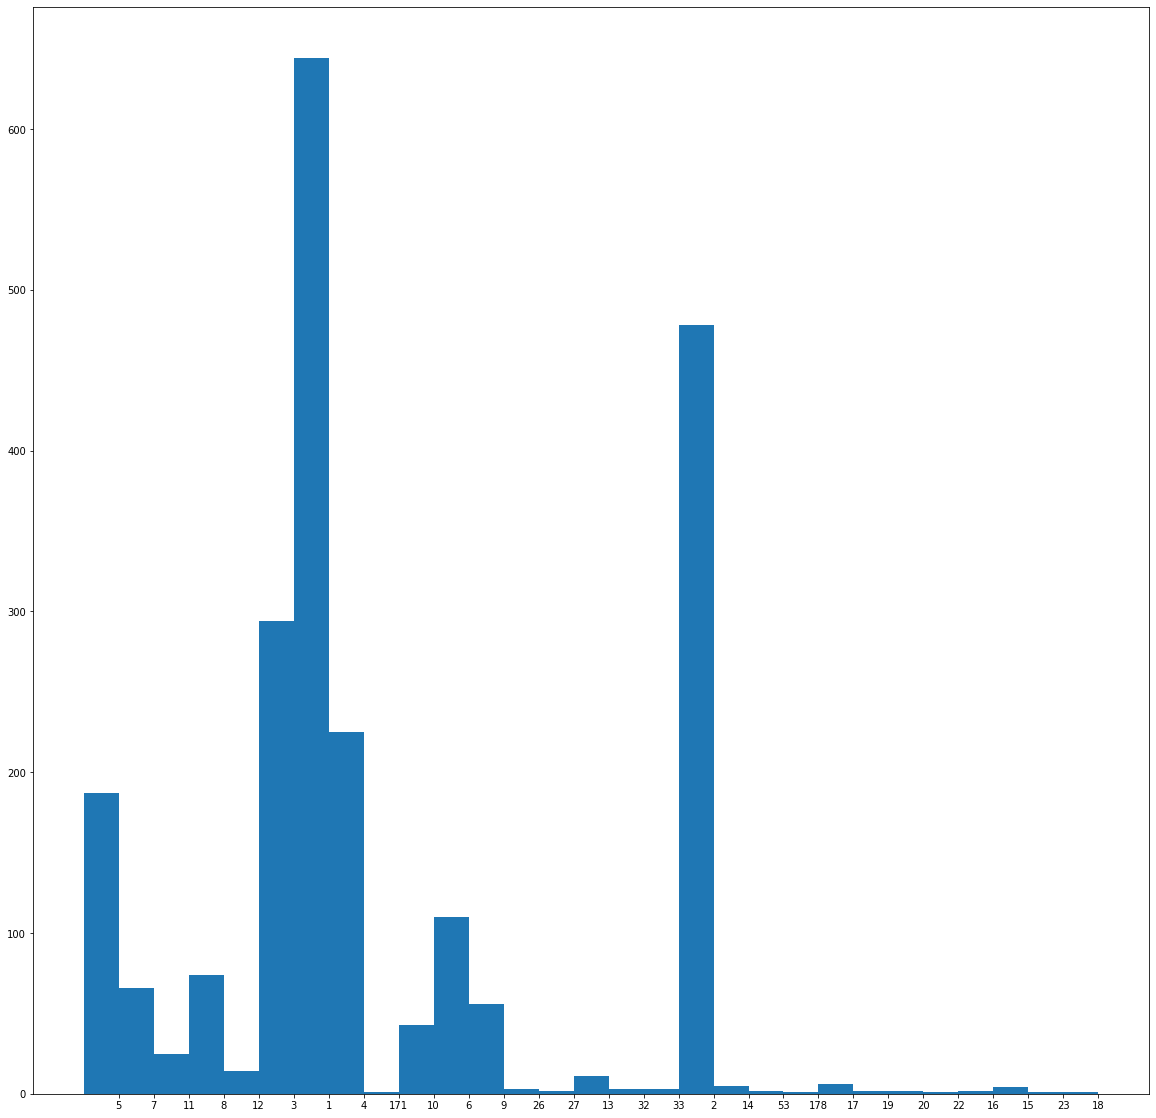

In [9]:
c = Counter(degcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.2 Eigenvector Centrality

In [10]:
eigcent = dict(nx.eigenvector_centrality(Comunity)).values()
c = Counter(eigcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

### 1.3 Closeness Centrality

In [ ]:
clocent = dict(nx.closeness_centrality(Comunity)).values()
c = Counter(clocent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.4 Betweeness Centrality

In [ ]:
btwcent = dict(nx.betweenness_centrality(Comunity)).values()
c = Counter(btwcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### 1.5 Shortest Path Length

In [ ]:
# Doesn't exist as graph is not connected fully
# avgshpath = nx.average_shortest_path_length(Comunity)

### Clustering Coefficient 

In [ ]:
culcoef = dict(nx.clustering(Comunity)).values()
c = Counter(culcoef)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### Question # 2: Identify the strong-ties and weak-ties.

In [ ]:
row=df.stid.unique().tolist()
col=df.crsid.unique().tolist()

from networkx.algorithms import bipartite
adjmtx=nx.algorithms.bipartite.matrix.biadjacency_matrix(Comunity,row_order=row,column_order=col)
user_matrix = adjmtx @ adjmtx.T

In [ ]:
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of Possible Community: {0}'.format(diag.max()))
print('User with the most interactions:')
for i in indices:
    print('- {0}'.format(row[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()
source=[]
target=[]
# Find pairs of users who shared Posts 
threshold=2
#max threshold can be 11
indices = np.where(users_coo.data >= threshold)[0]
print('People with most shared interactions:')
for idx in indices:
    print('- {0}, {1}'.format(row[users_coo.row[idx]], row[users_coo.col[idx]]))
    source.append(row[users_coo.row[idx]])
    target.append(row[users_coo.col[idx]])

In [ ]:
sim=pd.DataFrame()
sim['source']=source
sim['target']=target

In [ ]:
lst = sim['source'].value_counts(ascending=True)
print("Week ties:\n",lst[:10])

print("\n\n")

lst = sim['source'].value_counts(ascending=False)
print("Strong ties:\n",lst[:10])

In [ ]:
Comunity=nx.from_pandas_edgelist(sim, 'source', 'target', edge_attr=None ,create_using=nx.Graph())

In [ ]:
plt.figure(figsize=(20,20))
nx.draw(Comunity,node_size=100)

In [ ]:
#!pip install community
#!pip install python-louvain
#!pip install --upgrade networkx

import community
spring_pos = nx.spring_layout(Comunity)
parts = community.best_partition(Comunity)
values = [parts.get(node) for node in Comunity.nodes()]
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(Comunity, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=100, with_labels=False)
plt.show()

In [ ]:
community.modularity(parts,Comunity)

In [ ]:
print(np.unique(values).max())

In [ ]:
result = [(node, len(list(Comunity.neighbors(node)))) for node in Comunity.nodes()]
max(result, key=lambda node:node[1])

In [ ]:
# Network on 1276
Graph_1276 = nx.Graph(nx.ego_graph(Comunity, 1276, radius = 1))
plt.figure(3,figsize=(15,10)) 
nx.draw(Graph_1276, node_size=100,with_labels = False)

In [ ]:
users_coo.data.max()

In [ ]:
Comunity.degree[1276]

In [ ]:
# Get community degree for all the users here by looping and then sort desc by degree to get most influeential ones

In [ ]:
# Occurance metrix
ocurancMtx=pd.DataFrame(adjmtx.todense(),index=row,columns=col)

In [ ]:
ocurancMtx

### Question 3: Remove the most influential nodes from the social network and repeat the task (1 &amp; 2).

In [ ]:
# Most influential node is student id 1276; therefore removing it.
Comunity.remove_node(1276)
Comunity.remove_node(940)
Comunity.remove_node(798)
Comunity.remove_node(1556)
Comunity.remove_node(1654)
Comunity.remove_node(433)
Comunity.remove_node(1515)
Comunity.remove_node(429)
Comunity.remove_node(536)
Comunity.remove_node(1547)

In [ ]:
spring_pos = nx.spring_layout(Comunity)
parts = community.best_partition(Comunity)
values = [parts.get(node) for node in Comunity.nodes()]
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(Comunity, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=100, with_labels=False)
plt.show()

In [ ]:
result = [(node, len(list(Comunity.neighbors(node)))) for node in Comunity.nodes()]
max(result, key=lambda node:node[1])

In [ ]:
community.modularity(parts,Comunity)

In [ ]:
degcent = dict(nx.degree(Comunity)).values()
c = Counter(degcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
eigcent = dict(nx.eigenvector_centrality(Comunity)).values()
c = Counter(eigcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
clocent = dict(nx.closeness_centrality(Comunity)).values()
c = Counter(clocent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
btwcent = dict(nx.betweenness_centrality(Comunity)).values()
c = Counter(btwcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
culcoef = dict(nx.clustering(Comunity)).values()
c = Counter(culcoef)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### Question # 4:

In [ ]:
ListOfNodes = Comunity.nodes()
NumberofNodes = Comunity.number_of_nodes()

In [ ]:
import random
sample = 7
RandomSample = random.sample(ListOfNodes, sample)
print('Random node to be removed is: ', RandomSample)

In [ ]:
Comunity.remove_nodes_from(RandomSample)

In [ ]:
spring_pos = nx.spring_layout(Comunity)
parts = community.best_partition(Comunity)
values = [parts.get(node) for node in Comunity.nodes()]
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(Comunity, pos=spring_pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=100, with_labels=False)
plt.show()

In [ ]:
community.modularity(parts,Comunity)

In [ ]:
degcent = dict(nx.degree(Comunity)).values()
c = Counter(degcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

eigcent = dict(nx.eigenvector_centrality(Comunity)).values()
c = Counter(eigcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

clocent = dict(nx.closeness_centrality(Comunity)).values()
c = Counter(clocent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

btwcent = dict(nx.betweenness_centrality(Comunity)).values()
c = Counter(btwcent)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

culcoef = dict(nx.clustering(Comunity)).values()
c = Counter(culcoef)
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()